In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('vehicles.csv')

In [3]:
pd.options.display.max_columns = None

In [4]:
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,NaN,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,NaN,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [5]:
df.shape

(458213, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   url           458213 non-null  object 
 3   region        458213 non-null  object 
 4   region_url    458213 non-null  object 
 5   price         458213 non-null  int64  
 6   year          457163 non-null  float64
 7   manufacturer  439993 non-null  object 
 8   model         453367 non-null  object 
 9   condition     265273 non-null  object 
 10  cylinders     287073 non-null  object 
 11  fuel          454976 non-null  object 
 12  odometer      402910 non-null  float64
 13  title_status  455636 non-null  object 
 14  transmission  455771 non-null  object 
 15  VIN           270664 non-null  object 
 16  drive         324025 non-null  object 
 17  size          136865 non-null  object 
 18  type

### DATA CLEANING

#### Drop Redundant and Insignificant columns

* Dropping columns Unnamed: 0, id, url, region_url, image_url,VIN  because of its insignificance.

In [7]:
df.drop(columns=['Unnamed: 0','id','url','region_url','image_url','VIN','state','lat','long'],inplace = True)

##### Posting_date

In [8]:
year  = df['posting_date'].apply(lambda x: x[0:4] if type(x)!= float else x)
year.value_counts()

2020    458185
Name: posting_date, dtype: int64

##### Model

In [9]:
df['model'].value_counts()

f-150                8370
silverado 1500       5964
1500                 4211
camry                4033
accord               3730
                     ... 
benz s class s550       1
F350 UTILITY            1
savana cargo 1500       1
rav3                    1
outback turbo           1
Name: model, Length: 31520, dtype: int64

* Posting_Date is dropped as all cars belongs to same year '2020'
* Model is dropped ,since it has more value counts.
* Region is dropped as we have state feature present.

In [10]:
df.drop(columns = ['posting_date','model','description','region'],inplace = True)

#### Dropping Duplicates

In [11]:
df.duplicated().sum()

169152

In [12]:
df.drop_duplicates(inplace = True)

In [13]:
print('After removing duplicates,\nNo of rows:',df.shape[0],'\nNo of columns',df.shape[1])

After removing duplicates,
No of rows: 289061 
No of columns 13


#### Null Value Treatment

In [14]:
null = pd.DataFrame(df.isnull().sum()).reset_index()
null.columns = ['Features','value']
null['percent_of_null'] = round(null['value']*100/df.shape[0],2)
null

,Features,value,percent_of_null
0,price,0,0.00
1,year,695,0.24
2,manufacturer,11695,4.05
3,condition,112668,38.98
4,cylinders,100273,34.69
5,fuel,1779,0.62
6,odometer,36640,12.68
7,title_status,1471,0.51
8,transmission,1367,0.47
9,drive,83069,28.74


* since size has 68% of null values , it is dropped

In [15]:
df.drop('size',axis = 1,inplace = True)

#### Dropping rows

 * cylinders and drive plays a major role in cars , imputing may lead to wrong prediction.
 * price with '0' rows are removed as it is a target varible

In [16]:
df.dropna(axis = 0,subset={'cylinders','drive'},inplace = True)

In [17]:
df = df.loc[df['price'] != 0,:]

In [18]:
df.shape

(158793, 12)

In [19]:
print('After removing null value rows in cylinder and drive:')
null = pd.DataFrame(df.isnull().sum()).reset_index()
null.columns = ['Features','value']
null['percent_of_null'] = round(null['value']*100/df.shape[0],2)
null

After removing null value rows in cylinder and drive:


,Features,value,percent_of_null
0,price,0,0.00
1,year,532,0.34
2,manufacturer,5816,3.66
3,condition,35761,22.52
4,cylinders,0,0.00
5,fuel,721,0.45
6,odometer,11896,7.49
7,title_status,521,0.33
8,transmission,35,0.02
9,drive,0,0.00


#### Missing Value Treatment

In [20]:
import statistics as s

* *paint color*  is imputed with 'other' because car might have different colors other than the given colors.
* *manufacturer* is imputed with 'other' , as any of the manufacturer which is not in the list might be a possibility.
*  since most of the vehicles(around 80%) belongs to fuel-'gas',null values are imputed with it.
* *'year'*  has very less null values (around 0.4%), so it is treated with most repeated values.
* *'type'*  is imputed with 'other' as there is a chance of other types which is not mentioned.
* *'title_status'*  is also filled with most repeated value as it has very less percent of null.
* *'transmission'* has very less percent of null values , so it is treated with mode.

In [21]:
df['paint_color'].fillna('other',inplace = True)
df['manufacturer'].fillna('Not_Specified',inplace = True)
df['fuel'].fillna(s.mode(df['fuel']),inplace = True)
df['year'].fillna(s.mode(df['year']),inplace = True)
df['type'].fillna('other',inplace = True)
df['title_status'].fillna(s.mode(df['title_status']),inplace = True)
df['transmission'].fillna(s.mode(df['transmission']),inplace = True)

In [22]:
df.shape

(158793, 12)

##### Condition , odometer

* Null values present in condition is labeled as 'Not Mentioned'

In [23]:
df['condition'].value_counts()

excellent    58414
good         43598
like new     14224
fair          5633
new            696
salvage        467
Name: condition, dtype: int64

In [24]:
df['condition'].fillna('Not mentioned',inplace = True)

* In odometer , first bins are created to reduce noise.
* Then null values are filled with 0.

In [25]:
import math as m

In [26]:
odo= []
for i in df.odometer:
    if(m.isnan(i)):
        odo.append(i)
    elif(i<=25000):
        odo.append(1)
    elif(i>25000 and i<50000):
        odo.append(2)
    elif(i>50000 and i<=75000):
        odo.append(3)
    elif(i>75000 and i<=100000):
        odo.append(4)
    elif(i>100000 and i<=125000):
        odo.append(5)
    elif(i>125000 and i<=150000):
        odo.append(6)
    elif(i>150000 and i<=175000):
        odo.append(7)
    else:
        odo.append(8)
odo = pd.Series(odo,name='odo')

In [27]:
df.reset_index(inplace = True)

In [28]:
df.drop(columns = ['index'],inplace = True)

In [29]:
df.drop('odometer',axis = 1,inplace = True)

In [30]:
df = pd.concat((df,odo),axis =1)

In [31]:
df.head()

,price,year,manufacturer,condition,cylinders,fuel,title_status,transmission,drive,type,paint_color,odo
0,35990,2010.0,chevrolet,good,8 cylinders,gas,clean,other,rwd,other,other,2.0
1,7500,2014.0,hyundai,excellent,4 cylinders,gas,clean,automatic,fwd,sedan,other,4.0
2,2000,1974.0,chevrolet,good,4 cylinders,gas,clean,automatic,rwd,pickup,blue,8.0
3,19500,2005.0,ford,excellent,8 cylinders,diesel,lien,automatic,4wd,pickup,blue,5.0
4,39990,2012.0,ford,good,8 cylinders,gas,clean,other,rwd,coupe,blue,1.0


In [32]:
df['odo'].fillna('0',inplace = True)

In [33]:
null = pd.DataFrame(df.isnull().sum()).reset_index()
null.columns = ['Features','value']
null['percent_of_null'] = round(null['value']*100/df.shape[0],2)
null

,Features,value,percent_of_null
0,price,0,0.0
1,year,0,0.0
2,manufacturer,0,0.0
3,condition,0,0.0
4,cylinders,0,0.0
5,fuel,0,0.0
6,title_status,0,0.0
7,transmission,0,0.0
8,drive,0,0.0
9,type,0,0.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158793 entries, 0 to 158792
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         158793 non-null  int64  
 1   year          158793 non-null  float64
 2   manufacturer  158793 non-null  object 
 3   condition     158793 non-null  object 
 4   cylinders     158793 non-null  object 
 5   fuel          158793 non-null  object 
 6   title_status  158793 non-null  object 
 7   transmission  158793 non-null  object 
 8   drive         158793 non-null  object 
 9   type          158793 non-null  object 
 10  paint_color   158793 non-null  object 
 11  odo           158793 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 14.5+ MB


#### conversion of datatypes:

In [35]:
df['year'] = df['year'].astype(int)

### EXPLORATORY DATA ANALYSIS

#### univariate and bivariate analysis

##### Manufacturer

In [36]:
cumulative = df['manufacturer'].value_counts(normalize = True).cumsum()

* As first 20 manufacturers contributes to 90% of the vehicles, remaining are treated as 'others'.

In [37]:
l = cumulative.index[0:20]
df['manufacturer'] = df['manufacturer'].apply(lambda x:x if x in l else 'others')

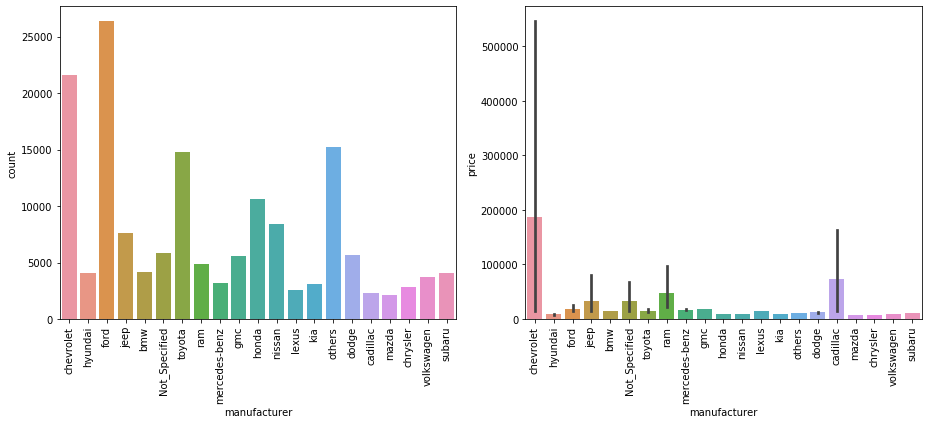

In [38]:
f,ax = plt.subplots(1,2,figsize = (13,6))

s = sns.countplot(df['manufacturer'],ax = ax[0])
ax[0].set_xticklabels(s.get_xticklabels(),rotation=90)

sns.barplot(df['manufacturer'],df['price'],ax =ax[1],)
plt.xticks(rotation = 90)

plt.tight_layout()

* 'Ford','Chevrolet' contributes most of the vehicles which is more than 25000.
*  Toyoto follows them in the order.
* The graph clearly shows 'Chevrolet' and 'cadillac' have the avg price higher compared to other vehicles.
* Even though 'cadillac' has less count of vehicles , it contributes to more avg price. It says that price of the vehicle is high comparitively.


##### Cylinders

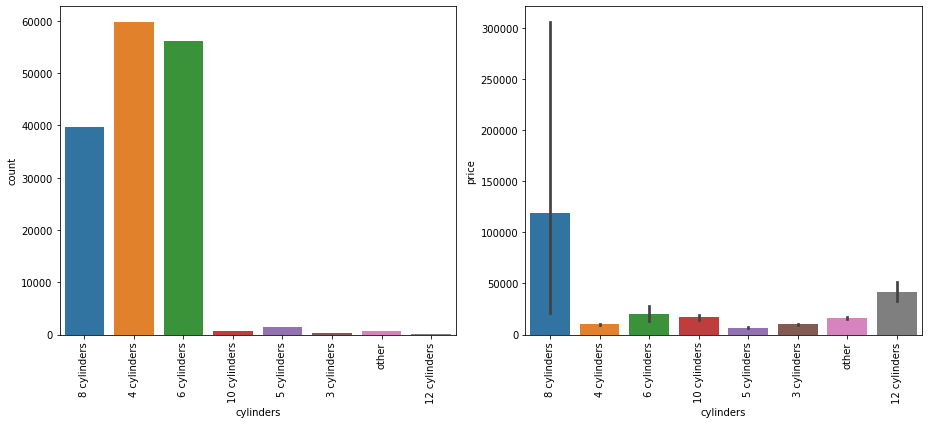

In [39]:
f,ax = plt.subplots(1,2,figsize = (13,6))

s = sns.countplot(df['cylinders'],ax = ax[0])
ax[0].set_xticklabels(s.get_xticklabels(),rotation=90)

sns.barplot(df['cylinders'],df['price'],ax =ax[1],)
plt.xticks(rotation = 90)
plt.tight_layout()

* Vehicles with 6,4,8 cylinders are very high compared to others.
* Remaining vehicles with cylinders 10,5,3 are less than 1000 which is very low.
* '12' cylinder vehicles are very very less in count but it contributes more avg price. This clearly says vehicles
   with '12' cylinders are ver high in price.
*  Then '8' cylinder vehicles seem to be higher than that of '4' and '6' as they are in same count range.

##### Fuel 

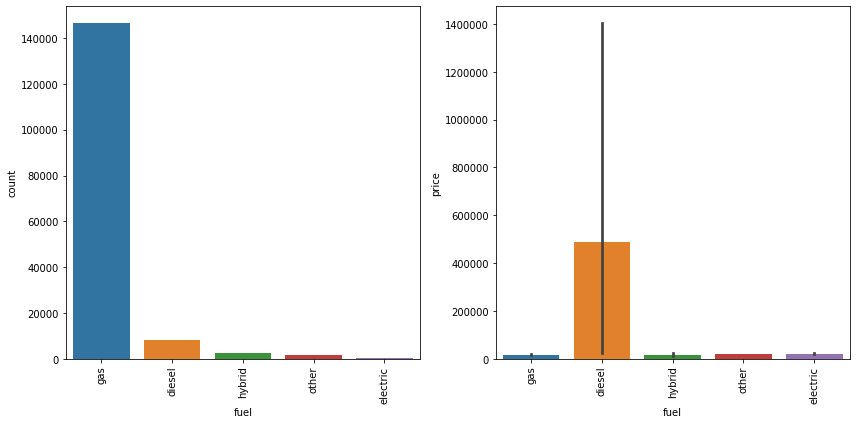

In [40]:
f,ax = plt.subplots(1,2,figsize = (12,6))

s = sns.countplot(df['fuel'],ax = ax[0])
ax[0].set_xticklabels(s.get_xticklabels(),rotation=90)

sns.barplot(df['fuel'],df['price'],ax =ax[1],)
plt.xticks(rotation = 90)
plt.tight_layout()

* Clearly , gas vehicles are very high in count which is around 175000+. It occupies more than 80% of data.
* Then 'diesel' which is around 10000+.
* 'Diesel' vehicles seem to be more costlier than all other fuels. 

##### Transmission

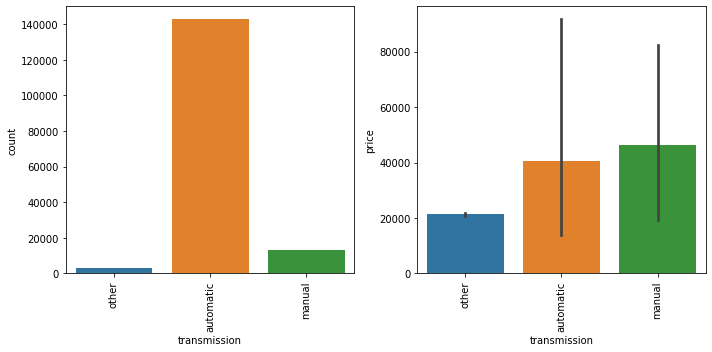

In [41]:
f,ax = plt.subplots(1,2,figsize = (10,5))

s = sns.countplot(df['transmission'],ax = ax[0])
ax[0].set_xticklabels(s.get_xticklabels(),rotation=90)

sns.barplot(df['transmission'],df['price'],ax =ax[1],)
plt.xticks(rotation = 90)
plt.tight_layout()

* 'Automatic' transmission vehicles are very high which is more than 80%
* 'Manual' vehicles are very less. It also infers that people prefer 'automatic' vehicles than manual transmission.
* 'Manual' seems to be more costlier. It is followed by 'automatic' .
*  There is no huge difference between these two.

##### Drive

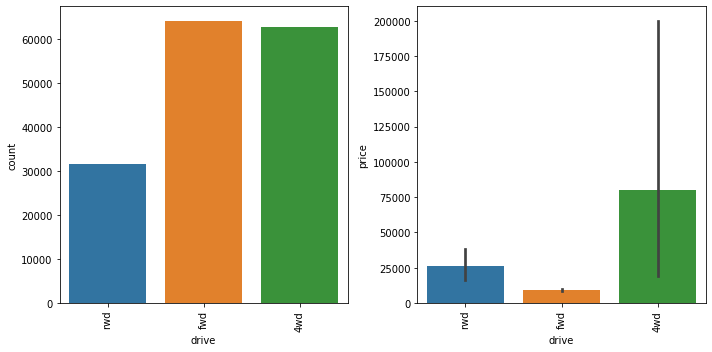

In [42]:
f,ax = plt.subplots(1,2,figsize = (10,5))

s = sns.countplot(df['drive'],ax = ax[0])
ax[0].set_xticklabels(s.get_xticklabels(),rotation=90)

sns.barplot(df['drive'],df['price'],ax =ax[1],)
plt.xticks(rotation = 90)
plt.tight_layout()

* It is quite strange that 4wd are more in count than other two. Mostly, 4wd is not used for personal use. It might be 
used for off-road or any other purposes.
* More than 80000+ vehicles are 4wd.
* 'Rwd' are mostly large vehicles such as trucks , buses etc.

* 4wd seems to be more costly than other two drives.
* people who look for less cost can prefer 'Fwd'.

##### Type

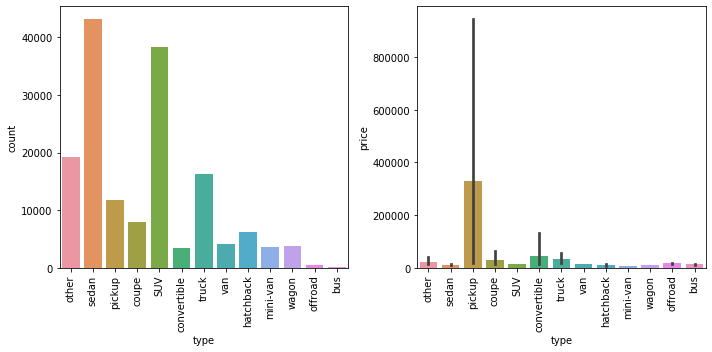

In [43]:
f,ax = plt.subplots(1,2,figsize = (10,5))

s = sns.countplot(df['type'],ax = ax[0])
ax[0].set_xticklabels(s.get_xticklabels(),rotation=90)

sns.barplot(df['type'],df['price'],ax =ax[1],)
plt.xticks(rotation = 90)
plt.tight_layout()

* 'sedan' and 'suv' are in more count around 40000+ each. Then it is followed by 'trucks' and 'pickup' vehicles.
* 'pick up' vehciles seem to be more costly.

##### paint_color

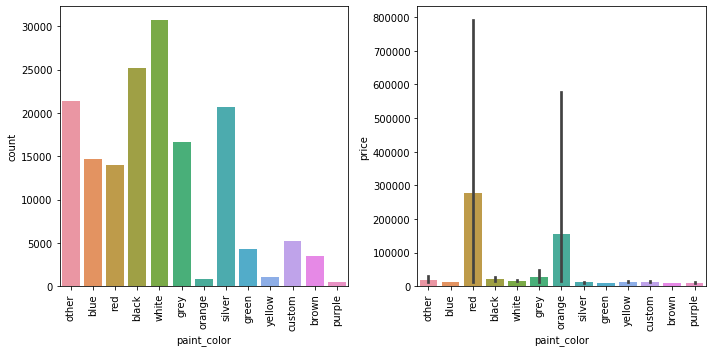

In [44]:
f,ax = plt.subplots(1,2,figsize = (10,5))

s = sns.countplot(df['paint_color'],ax = ax[0])
ax[0].set_xticklabels(s.get_xticklabels(),rotation=90)

sns.barplot(df['paint_color'],df['price'],ax =ax[1],)
plt.xticks(rotation = 90)
plt.tight_layout()

* Paint color plays a major role in vehicle selection as it attracts the people.
* colors such as 'white','black','silver' are in top count.
* Then 'red','blue' stands in the line.
* The graph-2 clearly says that 'red' and 'orange' color vehicles are more costlier than other. But we cannot come to conclusion because other features such as drive,transmission,'cylinders' also have huge responsibility in determining the cost.

##### odometer

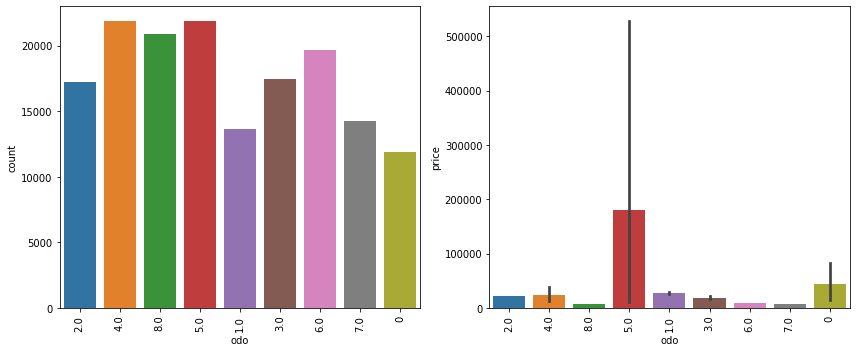

In [45]:
f,ax = plt.subplots(1,2,figsize = (12,5))

s = sns.countplot(df['odo'],ax = ax[0])
ax[0].set_xticklabels(s.get_xticklabels(),rotation=90)

sns.barplot(df['odo'],df['price'],ax =ax[1],)
plt.xticks(rotation = 90)

plt.tight_layout()

* Odometer range plays a major role in price detection
* Here vehicles are almost equally distributed which inludes all the ranges.
* Here price of vehicle which has a odometer range (100000-125000) is very high.

##### Title Status

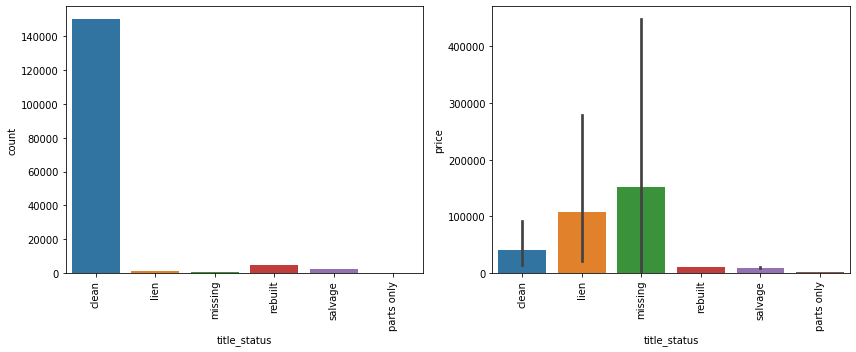

In [46]:
f,ax = plt.subplots(1,2,figsize = (12,5))

s = sns.countplot(df['title_status'],ax = ax[0])
ax[0].set_xticklabels(s.get_xticklabels(),rotation=90)

sns.barplot(df['title_status'],df['price'],ax =ax[1],)
plt.xticks(rotation = 90)

plt.tight_layout()

* clearly, 'clean' vehicles are more compared to others.
* 'parts_only' is almost null seems there are no separate parts present.
* status 'Missing' vehicles have high cost.

##### Condition

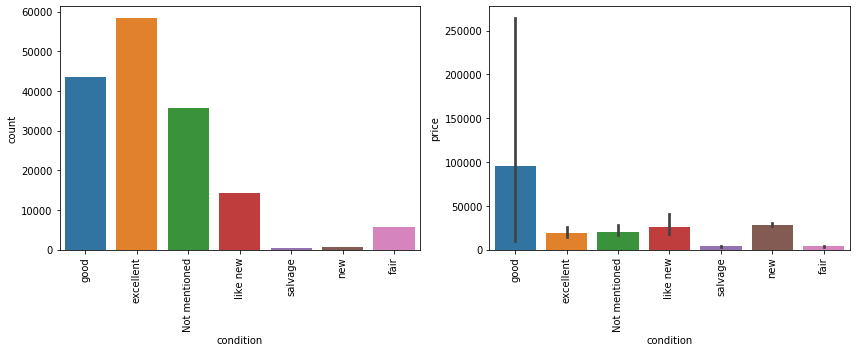

In [47]:
f,ax = plt.subplots(1,2,figsize = (12,5))

s = sns.countplot(df['condition'],ax = ax[0])
ax[0].set_xticklabels(s.get_xticklabels(),rotation=90)

sns.barplot(df['condition'],df['price'],ax =ax[1],)
plt.xticks(rotation = 90)

plt.tight_layout()

* Vehicles with condition - 'Good' and 'excellent' seems to be higher than other.
* Condition with 'Good' vehicles seem to be costly.

##### Year

In [48]:
cum_year = df['year'].value_counts(normalize = True).cumsum().head(21)

In [49]:
l = cum_year.index[0:20]
df['year'] = df['year'].apply(lambda x:x if x in l else 'other')

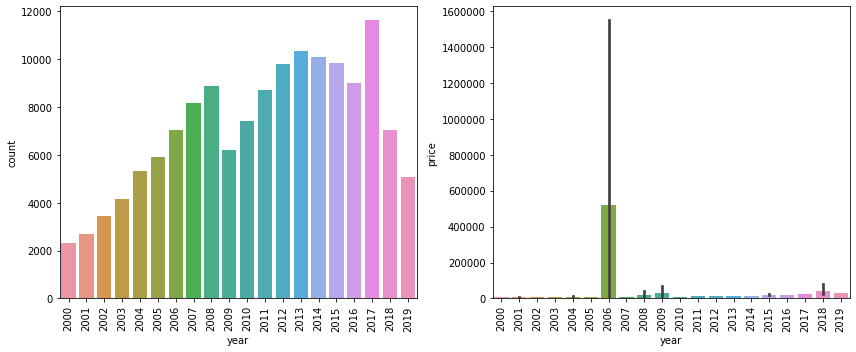

In [50]:
f,ax = plt.subplots(1,2,figsize = (12,5))

s = sns.countplot(df.loc[df['year']!='other','year'],ax = ax[0])
ax[0].set_xticklabels(s.get_xticklabels(),rotation=90)

sns.barplot(df.loc[df['year']!='other','year'],df['price'],ax =ax[1],)
plt.xticks(rotation = 90)

plt.tight_layout()

* 2017 models are very high which is around 16000+ vehicles.
* 2014,2013,2012 models are also counts to 13000+ each.
* Here vehicles in the year 2006 are more costlier. It might be a possibility that belongs to luxury brand. 

### FEATURE ENGINEERING & FEATURE SELECTION

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158793 entries, 0 to 158792
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         158793 non-null  int64 
 1   year          158793 non-null  object
 2   manufacturer  158793 non-null  object
 3   condition     158793 non-null  object
 4   cylinders     158793 non-null  object
 5   fuel          158793 non-null  object
 6   title_status  158793 non-null  object
 7   transmission  158793 non-null  object
 8   drive         158793 non-null  object
 9   type          158793 non-null  object
 10  paint_color   158793 non-null  object
 11  odo           158793 non-null  object
dtypes: int64(1), object(11)
memory usage: 14.5+ MB


In [80]:
X = df.iloc[:,1:]
y = np.log(df['price'])

In [81]:
df_encoded = pd.get_dummies(X,drop_first= True)

In [82]:
import statsmodels.api as sm
from statsmodels.api import add_constant

In [83]:
xc = sm.add_constant(df_encoded)

In [84]:
model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     1108.
Date:                Sat, 02 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:04:47   Log-Likelihood:            -2.0252e+05
No. Observations:              158793   AIC:                         4.052e+05
Df Residuals:                  158694   BIC:                         4.062e+05
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          8.9596      0.043    209.650      0.000       8.876       9.043
year_2001                     -0.0260      0.025     -1.059      0.290      -0.074       0.022
year_2002                      0.0482      0.023      2.068      0.039       0.003       0.094
year_2003                      0.0887      0.023      3.937      0.000       0.045       0.133
year_2004                      0.1482      0.022      6.846      0.000       0.106       0.191
year_2005                      0.1983      0.021      9.289      0.000       0.156       0.240
year_2006                      0.2929      0.021     14.029      0.000       0.252       0.334
year_2007                      0.3998      0.021     19.443      0.000       0.359       0.440
year_2008                      0.4749      0.020     23.261      0.000       0.435       0.515
year_2009                      0.5625      0.021     26.359      0.000       0.521       0.604
year_2010                      0.6553      0.021     31.328      0.000       0.614       0.696
year_2011                      0.7627      0.021     37.036      0.000       0.722       0.803
year_2012                      0.8445      0.020     41.375      0.000       0.804       0.884
year_2013                      0.9374      0.020     45.964      0.000       0.897       0.977
year_2014                      1.0002      0.021     48.785      0.000       0.960       1.040
year_2015                      1.0838      0.021     52.497      0.000       1.043       1.124
year_2016                      1.1391      0.021     54.324      0.000       1.098       1.180
year_2017                      1.1897      0.021     57.296      0.000       1.149       1.230
year_2018                      1.1853      0.022     54.045      0.000       1.142       1.228
year_2019                      1.0758      0.023     46.554      0.000       1.031       1.121
year_other                     0.2682      0.020     13.728      0.000       0.230       0.306
manufacturer_bmw               0.0414      0.018      2.281      0.023       0.006       0.077
manufacturer_cadillac          0.0558      0.022      2.570      0.010       0.013       0.098
manufacturer_chevrolet        -0.0572      0.013     -4.350      0.000      -0.083      -0.031
manufacturer_chrysler         -0.2177      0.020    -10.687      0.000      -0.258      -0.178
manufacturer_dodge            -0.2239      0.017    -13.477      0.000      -0.257      -0.191
manufacturer_ford             -0.0992      0.013     -7.706      0.000      -0.124      -0.074
manufacturer_gmc              -0.0316      0.017     -1.880      0.060      -0.064       0.001
manufacturer_honda             0.1213      0.015      8.244      0.000       0.092       0.150
manufacturer_hyundai          -0.1091      

#### Model 1 - Linear Regression with feature selection

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

xtrain,xtest,ytrain,ytest = train_test_split(df_encoded,y,test_size = 0.3,random_state = 0)

In [57]:
from sklearn.feature_selection import RFE

In [86]:
linreg_rfe = LinearRegression()
rfe_model = RFE(estimator=linreg_rfe, n_features_to_select = 50)
rfe_model = rfe_model.fit(xtrain, ytrain)
feat_index = pd.Series(data = rfe_model.ranking_, index = xtrain.columns)
signi_feat_rfe = feat_index[feat_index==1].index
print(signi_feat_rfe)

Index(['year_2006', 'year_2007', 'year_2008', 'year_2009', 'year_2010',
       'year_2011', 'year_2012', 'year_2013', 'year_2014', 'year_2015',
       'year_2016', 'year_2017', 'year_2018', 'year_2019', 'year_other',
       'manufacturer_chrysler', 'manufacturer_dodge', 'manufacturer_honda',
       'manufacturer_lexus', 'manufacturer_toyota', 'condition_fair',
       'condition_new', 'condition_salvage', 'cylinders_12 cylinders',
       'cylinders_3 cylinders', 'cylinders_4 cylinders',
       'cylinders_5 cylinders', 'cylinders_6 cylinders',
       'cylinders_8 cylinders', 'cylinders_other', 'fuel_electric', 'fuel_gas',
       'fuel_hybrid', 'fuel_other', 'title_status_lien',
       'title_status_missing', 'title_status_parts only', 'drive_fwd',
       'type_bus', 'type_convertible', 'type_offroad', 'paint_color_orange',
       'paint_color_other', 'odo_3.0', 'odo_4.0', 'odo_5.0', 'odo_6.0',
       'odo_7.0', 'odo_8.0', 'odo_0'],
      dtype='object')


In [87]:
xtrain_rfe = xtrain[signi_feat_rfe]
xtest_rfe = xtest[signi_feat_rfe]

In [88]:
m1 = LinearRegression()
m1.fit(xtrain_rfe,ytrain)
ypred = m1.predict(xtest_rfe)

In [89]:
from sklearn.metrics import r2_score
r2_score(ytest,ypred)

0.40954272626118404

#### Model 2 - Random Forest Regressor

In [92]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)

RandomForestRegressor()

In [95]:
ypred = rf.predict(xtest)

In [96]:
r2_score(ytest,ypred)

0.43773237849039803

#### Model 3 - Gradient Boost Regressor

In [99]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(xtrain,ytrain)

GradientBoostingRegressor()

In [100]:
ypred = gbr.predict(xtest)

In [101]:
r2_score(ytest,ypred)

0.4092409612861595

#### Applying PCA

In [105]:
from sklearn.decomposition import PCA

In [106]:
pca = PCA(n_components=60)
pca.fit(df_encoded)
X_pca = pca.transform(df_encoded)

In [107]:
pca.explained_variance_ratio_

array([0.09754276, 0.05901492, 0.05563355, 0.0332815 , 0.03084423,
       0.02992923, 0.02730935, 0.02562159, 0.02446339, 0.02347132,
       0.02328073, 0.02175619, 0.02045857, 0.02037921, 0.01921965,
       0.018979  , 0.01764047, 0.01697212, 0.01640947, 0.01597319,
       0.01557458, 0.01509186, 0.01444311, 0.01371914, 0.01329647,
       0.01228167, 0.0118233 , 0.01116506, 0.01098567, 0.0107114 ,
       0.010563  , 0.01038136, 0.00998221, 0.00982345, 0.00960983,
       0.00936171, 0.00902672, 0.00870685, 0.00836006, 0.00801452,
       0.00762586, 0.00749223, 0.00726391, 0.00698743, 0.00679791,
       0.00662303, 0.00641071, 0.00603846, 0.0058669 , 0.00567858,
       0.00547895, 0.00528213, 0.00514762, 0.00490649, 0.00472311,
       0.00445399, 0.00443907, 0.00426095, 0.00416763, 0.00401321])

In [129]:
pca.explained_variance_ratio_[0:60].sum()

0.9347606298832128

In [130]:
new = pd.concat([pd.DataFrame(X_pca),df['price']],axis = 1)
x = new.drop('price',axis = 1)
y = np.log(new['price'])

In [131]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [132]:
from sklearn.ensemble import RandomForestRegressor

In [133]:
m2 = RandomForestRegressor()
m2.fit(xtrain,ytrain)

RandomForestRegressor()

In [134]:
ypred = m2.predict(xtest)

In [135]:
r2_score(ytest,ypred)

0.4313737246753947